
<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/spring_2023_iub/lessons/06_advanced_plotting/06_workalong02_mapping.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Mapping

This workalong and exercise introduce mapping in `matplotlib`. We'll build from the figure we created in the first workalong.

In [1]:
""" Check if this notebook is being run in Google Colab """

# if the notebook is being run in google colab, we need to install cartopy in a special way

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False


if IN_COLAB:
  # install cartopy if it isn't already installed
  try:
    import cartopy
  except:
    # force re-installation of shapely, otherwise cartopy breaks in google colab
    # upgrade pip
    ! pip install --upgrade pip
    # remove the current version of shapely
    ! pip uninstall shapely --yes
    # install shapely and cartopy simultaneously, forcing compilation
    ! pip install --no-binary shapely cartopy
    # install cmocean too
    ! pip install cmocean

In [2]:
""" Import libraries """
import matplotlib.pyplot as plt
import xarray as xr
import cartopy

In [5]:
""" Load the dataset """

input_file = "air.2m.gauss.2021.nc"

# download the data file if needed
import os
if not os.path.exists(input_file):
    url = f"https://psl.noaa.gov/thredds/fileServer/Datasets/ncep.reanalysis2/gaussian_grid/air.2m.gauss.2021.nc"
    ! curl --output {input_file} {url}

# open the dataset using xarray
temp_ds = xr.open_dataset(input_file, chunks = -1)

""" Calculate the hottest temperature recorded in each season. """

# xarray is built on top of pandas, so we can use groupby for this
season_groups = temp_ds.groupby('time.season')

# calculate the max in each season
season_max_temp = season_groups.max()

# extract temperature (and also use 'squeeze' to remove the pesky single-item level dimension)
max_temp_xr = season_max_temp['air'].squeeze()

# pull out coordinates
seasons = max_temp_xr.season
lat = max_temp_xr.lat
lon = max_temp_xr.lon

# force the calculation
max_temp_xr.load();

In [4]:
# check if the data look ok
max_temp_xr.

SyntaxError: invalid syntax (590389949.py, line 2)

# Cartopy

For mapping, we'll use `cartopy`.  Cartopy defines *projection* as the map projection on which the dataset will be drawn.  It defines the *transform* of the dataset as the projection on which the dataset exists.  They can be the same, but they don't have to be.

Let's just explore projections.

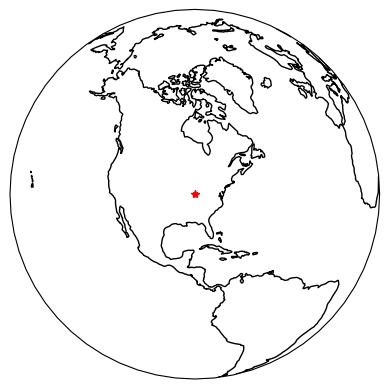

In [9]:
Bloomington_lon = -86.526386
Bloomington_lat = 39.165325

projection = cartopy.crs.Orthographic(central_longitude=Bloomington_lon, central_latitude=Bloomington_lat)
transform = cartopy.crs.PlateCarree()

# create a figure
fig, ax = plt.subplots(subplot_kw=(dict(projection=projection)))

ax.coastlines()

ax.plot(Bloomington_lon, Bloomington_lat, 'r*', transform=transform)

ax.set_global()

plt.show()

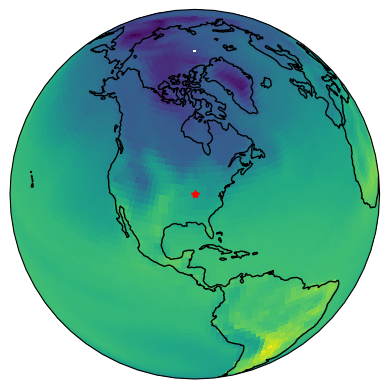

In [12]:
Bloomington_lon = -86.526386
Bloomington_lat = 39.165325

projection = cartopy.crs.Orthographic(central_longitude=Bloomington_lon, central_latitude=Bloomington_lat)
transform = cartopy.crs.PlateCarree()

# create a figure
fig, ax = plt.subplots(subplot_kw=(dict(projection=projection)))

# draw the DJF data
max_temp_djf = max_temp_xr.sel(season = 'DJF')
lat = max_temp_djf.lat
lon = max_temp_djf.lon
ax.pcolormesh(lon, lat, max_temp_djf, transform=transform)

ax.coastlines()

ax.plot(Bloomington_lon, Bloomington_lat, 'r*', transform=transform)

ax.set_global()

plt.show()

In [13]:
# add nice colormaps
import cmocean
cmap = cmocean.cm.thermal

import numpy as np

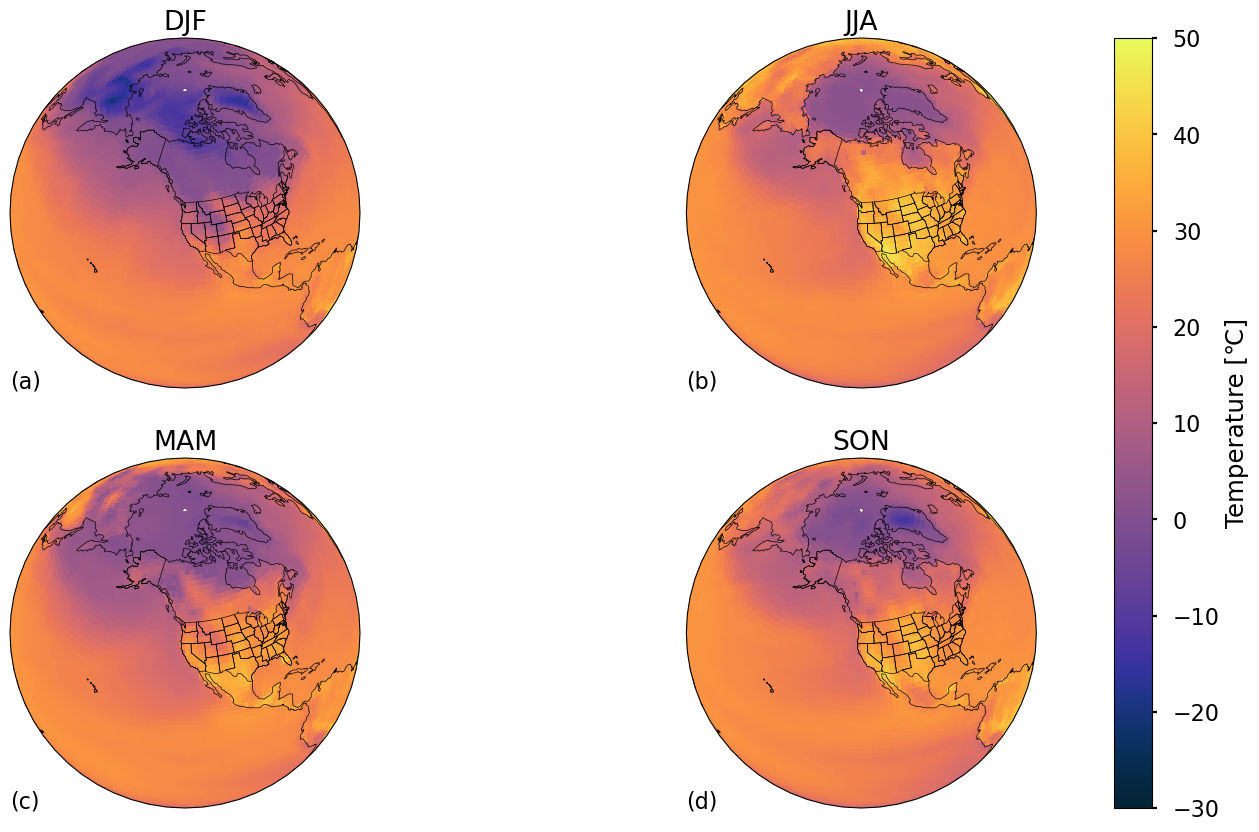

In [21]:
""" Plot the hottest temperature recorded in each season with maplines. """
# set the plot style
plt.style.use('seaborn-v0_8-poster')

portland_lon = -122.6765
portland_lat = 45.5231
# projection
projection = cartopy.crs.Orthographic(central_longitude=portland_lon, central_latitude=portland_lat)
transform = cartopy.crs.PlateCarree()

fig, axs2d = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True, subplot_kw=(dict(projection=projection)))

axs = axs2d.ravel()

labels = ['(a)', '(b)', '(c)', '(d)']

# select the season's data
for ax, season, label in zip(axs, seasons, labels):
    max_temp_this_season = max_temp_xr.sel(season = season) - 273.15
    cplt = ax.pcolormesh(lon, lat, max_temp_this_season, cmap=cmap, vmin=-30, vmax=50, transform=transform)
    ax.coastlines()
    ax.add_feature(cartopy.feature.STATES)
    ax.set_global()
    #fig.colorbar(cplt, ax=ax, label="Temperature [℃]")
    #ax.set_yticks(np.arange(-80, 100, 20))
    ax.text(0.00, 0.00, label, transform=ax.transAxes, fontsize=16)
    #ax.set_ylabel("Latitude [°N]")
    #ax.set_xlabel("Longitude [°E]")
    ax.set_title(str(season.values))

fig.colorbar(cplt, ax=axs, label="Temperature [℃]")
#plt.tight_layout()
plt.savefig("season_max_temp_proj", dpi=300, bbox_inches='tight')
plt.show()